<a href="https://colab.research.google.com/github/Taehee-K/Korean-Speech-Emotion-Recognition/blob/eda/visualization/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한국어 형태소 분석기
!pip install konlpy
# 한글 폰트
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import os
import pandas as pd

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

from konlpy.tag import *
from wordcloud import WordCloud

In [ ]:
# Check installation of Korean font

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


# Load Data

In [ ]:
path = os.path.dirname(os.path.abspath(__file__))
os.chdir(path)

df = pd.read_csv('./data/most_common.csv')
df.head()

,speech,emotion
0,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,Angry
1,지금도 그대로 있어. 치우는 사람이 없어.,Disgust
2,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,Sadness
3,오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.,Sadness
4,그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!,Angry


# Word Cloud

In [ ]:
#각 클래스별 발화문의 명사 워드클라우드
def count_words(speech):
    word_counts = {}

    komoran = Komoran()
    for s in speech:
        nouns = komoran.nouns(s)
        for noun in nouns:
            if len(noun) == 1:     # 한 글자 명사 제외
            	continue
            if noun not in word_counts:
                word_counts[noun] = 0
            word_counts[noun] += 1
    
    return word_counts

In [ ]:
# 각 클래스별 발화문 
words_emotion = {}
for emo in df['emotion'].value_counts().index:
  speech = df[df['emotion']==emo].speech
  words_emotion[emo] = count_words(speech)

In [ ]:
wc = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    background_color = 'white',
    width = 800,
    height = 800
)

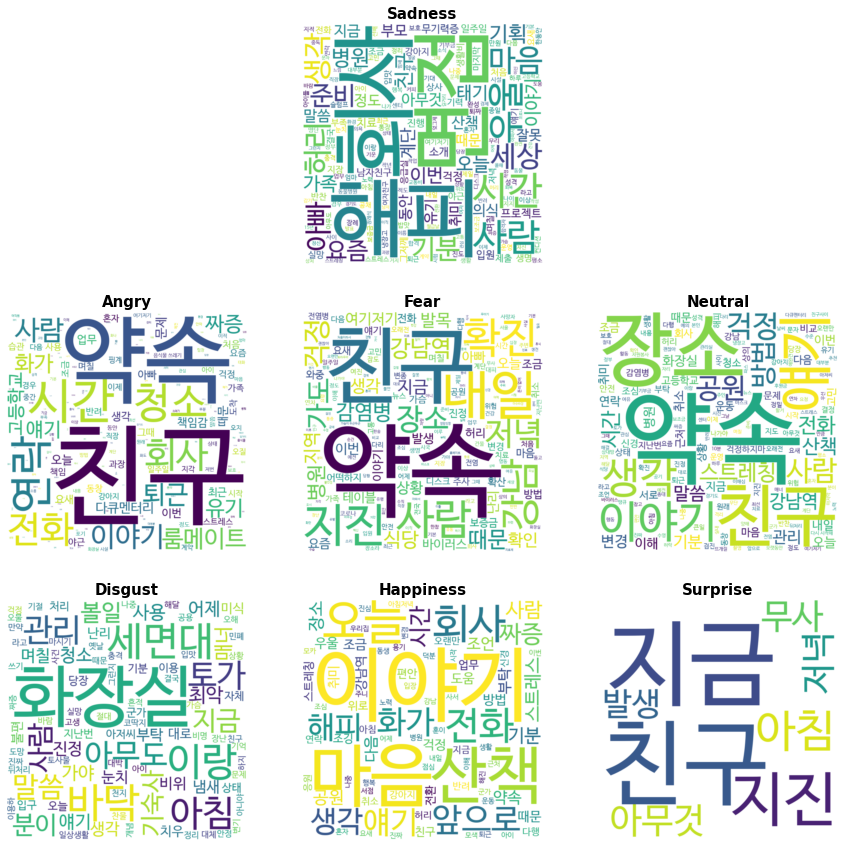

In [ ]:
fig = plt.figure(figsize=(15, 15))

for i, emo in enumerate(words_emotion.keys()):
  if i==0:  ax = fig.add_subplot(3, 3, i+2)
  else: ax = fig.add_subplot(3, 3, i+3)
  wc.generate_from_frequencies(words_emotion[emo])
  ax.imshow(wc.to_array(), interpolation='bilinear')
  ax.set_title(emo, fontsize=15, fontweight='bold')
  ax.axis('off')

plt.rc('font', family=font_name)
fm._rebuild()
plt.show()
fig.savefig('wordcloud.png')